# Install dependencies

In [1]:
# Install deps

%pip install kaggle ultralytics 

Note: you may need to restart the kernel to use updated packages.


# Download dataset

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    dataset="norbertelter/pcb-defect-dataset",
    quiet=False,
    unzip=True,
)

100%|██████████| 1.10G/1.10G [00:50<00:00, 23.5MB/s]


In [13]:
# List files
from glob import glob
import pandas as pd
    
dataset_train_files = glob('pcb-defect-dataset/train/images/**.jpg')
df = pd.DataFrame(data={'File': dataset_train_files})
df

,File
0,pcb-defect-dataset/train/images/light_12_short...
1,pcb-defect-dataset/train/images/rotation_270_l...
2,pcb-defect-dataset/train/images/rotation_270_l...
3,pcb-defect-dataset/train/images/rotation_270_l...
4,pcb-defect-dataset/train/images/rotation_90_li...
...,...
8529,pcb-defect-dataset/train/images/rotation_270_l...
8530,pcb-defect-dataset/train/images/rotation_90_li...
8531,pcb-defect-dataset/train/images/light_12_spur_...
8532,pcb-defect-dataset/train/images/l_light_05_sho...


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_images(images, width, height, columns=2, rows=3):
    fig = plt.figure(figsize=(width, height))
    for i, file in enumerate(images):
        img = plt.imread(file)
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
    plt.show()

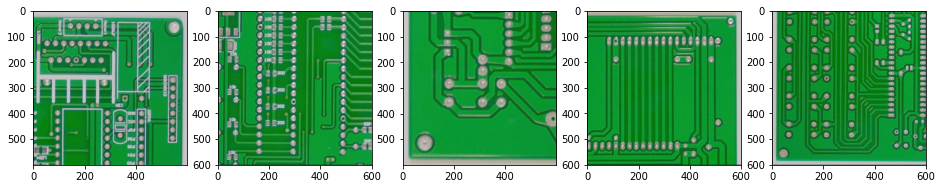

In [18]:
# Show sample

dataset_sample = glob('pcb-defect-dataset/train/images/*missing*.jpg')[:5]

plot_images(dataset_sample, width=16, height=8, columns=5, rows=1)

# Training

In [19]:
EPOCHS = 50
BATCH_SIZE = 8
IMAGE_RESOLUTION = 640

In [ ]:
from ultralytics import YOLO

# Load the pretrained model
model = YOLO('yolov8x.pt')

In [ ]:
# Training the model
results = model.train(
   data='pcb-defect-dataset/data.yaml',
   imgsz=IMAGE_RESOLUTION,
   epochs=EPOCHS,
   batch=BATCH_SIZE,
   name='yolov8x_pcb'
)

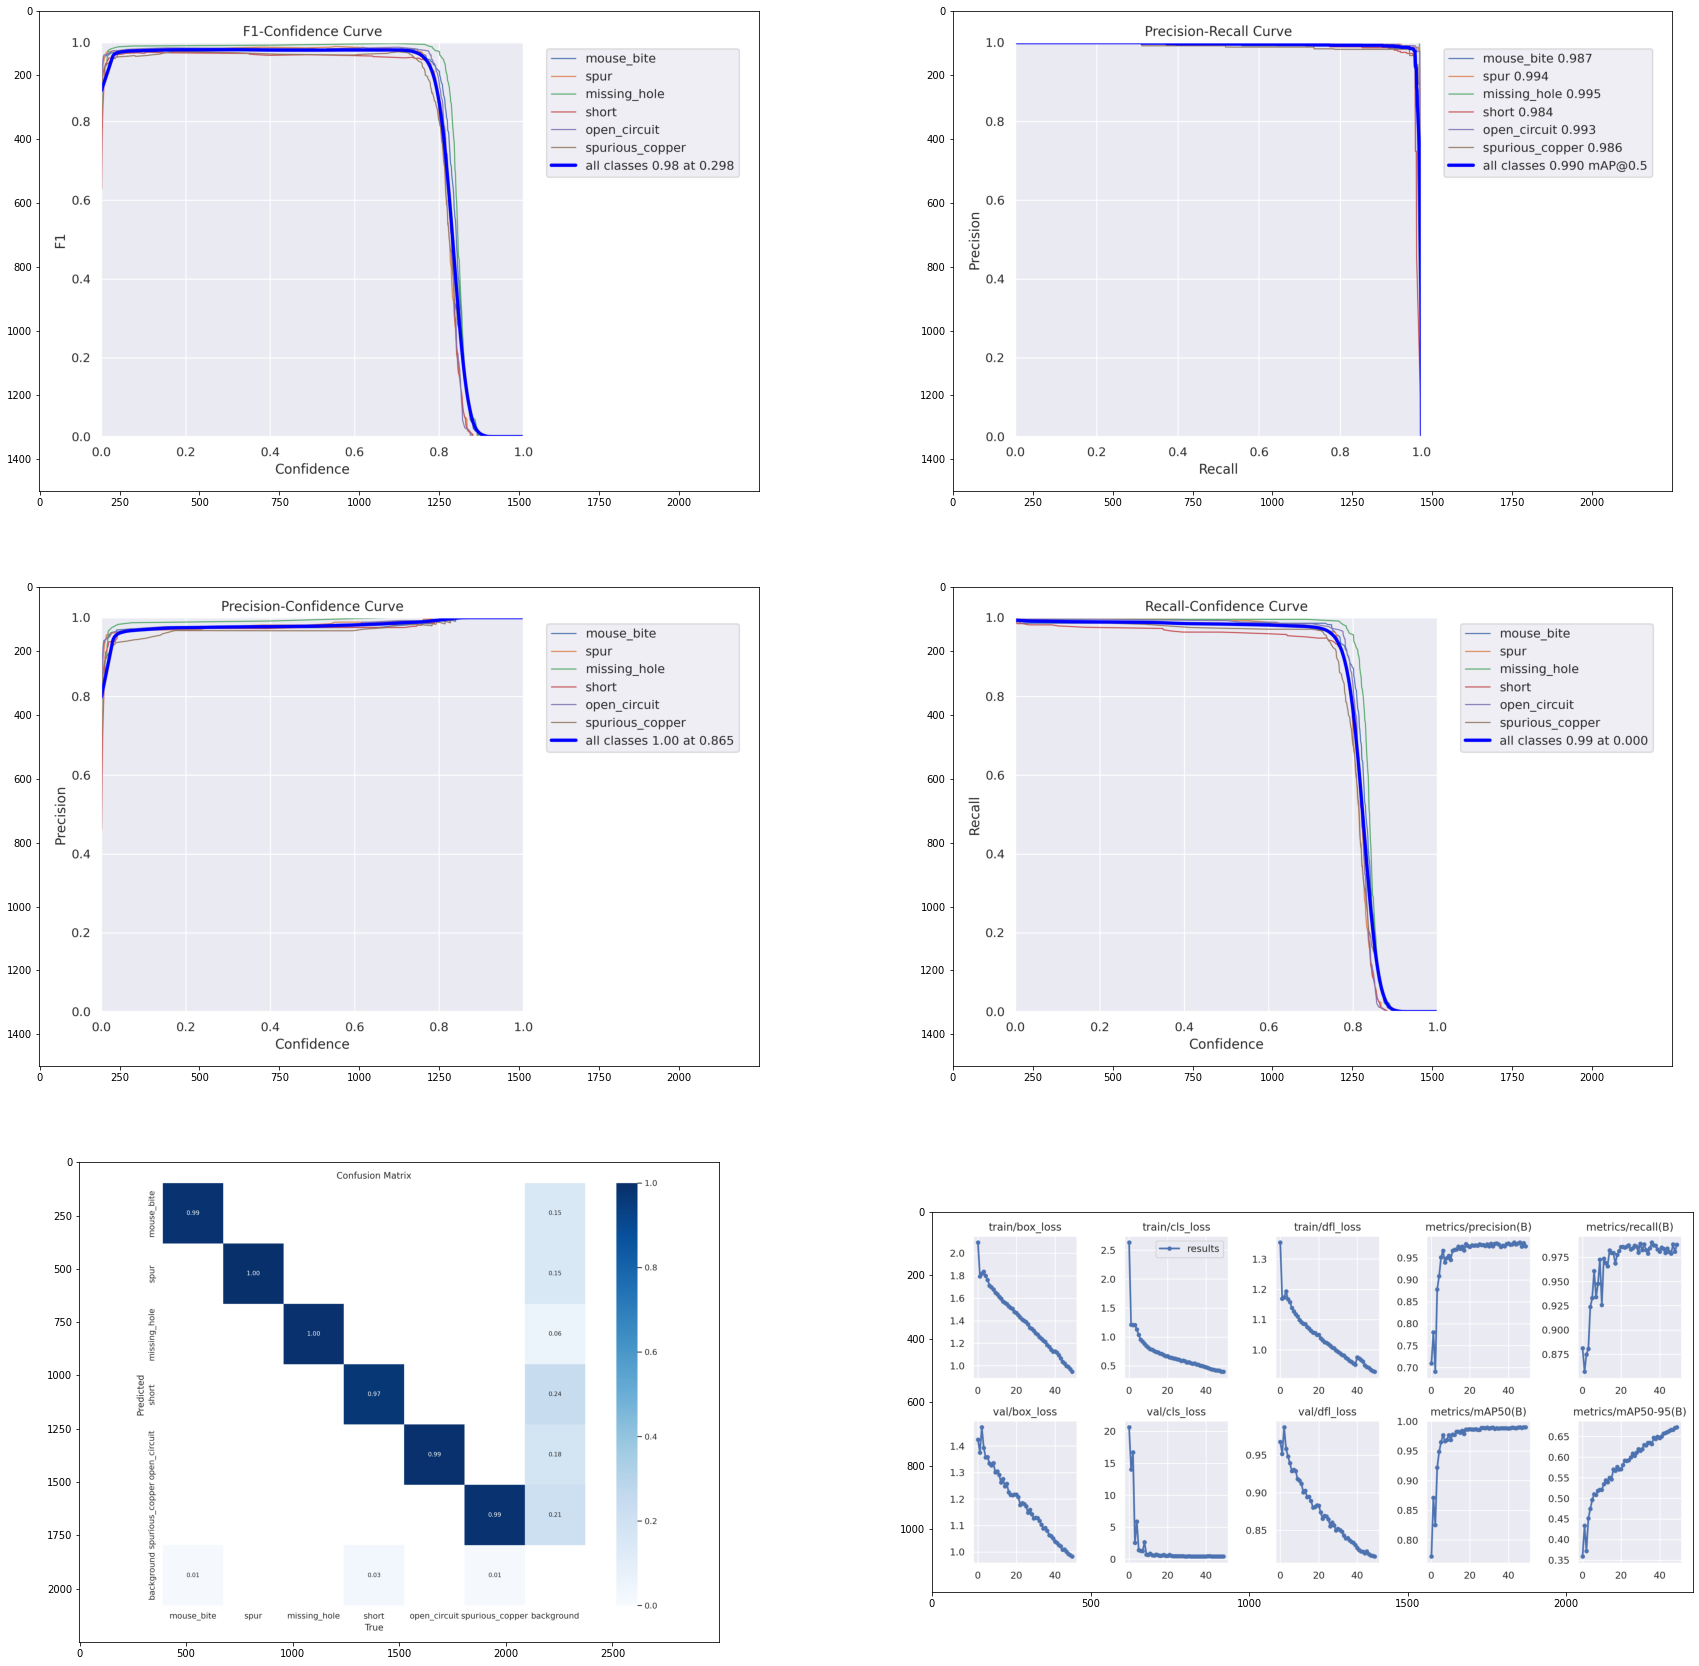

                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      0,                 2.0958,                 2.6327,                 1.3551,                0.70961,                0.88141,                0.77208,                0.35885,                 1.4246,                 20.645,                0.96765,               0.070028,              0.0033302,              0.0033302
                      1,                 1.7934,                 1.2121,                 1.1689,                0.78054,                0.85698,                0.87133,                0.43365,                 1.3746,                 14.038,                0.95128,               0.039896,              0.0065316,              0.

In [4]:
# Show results

model_path = './pcb_model'

curves = [f'{model_path}/F1_curve.png', f'{model_path}/PR_curve.png', f'{model_path}/P_curve.png', f'{model_path}/R_curve.png', f'{model_path}/confusion_matrix.png', f'{model_path}/results.png']

plot_images(curves, width=30, height=30, columns=2, rows=3)

with open(f'{model_path}/results.csv') as f:
    file_contents = f.read()
    print(file_contents)

test_batch = [f'{model_path}/val_batch0_pred.jpg', f'{model_path}/val_batch1_pred.jpg', f'{model_path}/val_batch2_pred.jpg']
plot_images(test_batch, width=30, height=30, columns=3, rows=1)

# Testing

## Load the model

In [1]:
from ultralytics import YOLO

model = YOLO(model='./pcb_model/weights/best.pt', task='detect')

## Test detection


image 1/1 /Users/norbert.elter/private/pcb-ai/pcb-defect-dataset/test/images/l_light_01_missing_hole_04_2_600.jpg: 640x640 2 missing_holes, 509.7ms
Speed: 0.7ms preprocess, 509.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


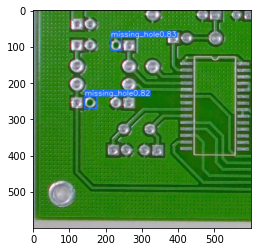

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

predictions = model.predict('./pcb-defect-dataset/test/images/l_light_01_missing_hole_04_2_600.jpg')

for prediction in predictions:
    img = prediction.plot()
    plt.imshow(img)
    plt.show()